In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
air_quality = pd.read_csv("../data/processed/air_quality_transformed.csv")
water_quality = pd.read_csv("../data/processed/water_quality_transformed.csv")
deforestation = pd.read_csv("../data/processed/deforestation_transformed.csv")

In [3]:
policies = {
    "Air Quality Policy": 2010,
    "Water Quality Improvement Act": 2015,
    "Deforestation Reduction Agreement": 2005,
}

In [4]:
def calculate_policy_effectiveness(data, year_col, value_col, policy_year):
    """Calculate pre- and post-policy averages and difference."""
    pre_policy = data[data[year_col] < policy_year][value_col].mean()
    post_policy = data[data[year_col] >= policy_year][value_col].mean()
    change = post_policy - pre_policy
    return pre_policy, post_policy, change

In [5]:
if 'Year' in air_quality.columns and 'Data Value' in air_quality.columns:
    pre_air, post_air, change_air = calculate_policy_effectiveness(
        air_quality, 'Year', 'Data Value', policies["Air Quality Policy"]
    )
    print(f"Air Quality Policy (2010):")
    print(f"- Pre-policy average AQI: {pre_air:.2f}")
    print(f"- Post-policy average AQI: {post_air:.2f}")
    print(f"- Change in AQI: {change_air:.2f}")

Air Quality Policy (2010):
- Pre-policy average AQI: 30.63
- Post-policy average AQI: 19.73
- Change in AQI: -10.90


In [6]:
if 'Year' in water_quality.columns and 'pH_Filled' in water_quality.columns:
    pre_water, post_water, change_water = calculate_policy_effectiveness(
        water_quality, 'Year', 'pH_Filled', policies["Water Quality Improvement Act"]
    )
    print(f"\nWater Quality Improvement Act (2015):")
    print(f"- Pre-policy average pH: {pre_water:.2f}")
    print(f"- Post-policy average pH: {post_water:.2f}")
    print(f"- Change in pH: {change_water:.2f}")


Water Quality Improvement Act (2015):
- Pre-policy average pH: 7.29
- Post-policy average pH: 6.88
- Change in pH: -0.41


In [7]:
if 'Year' in deforestation.columns and 'forest_change_percentage' in deforestation.columns:
    pre_deforest, post_deforest, change_deforest = calculate_policy_effectiveness(
        deforestation, 'Year', 'forest_change_percentage', policies["Deforestation Reduction Agreement"]
    )
    print(f"\nDeforestation Reduction Agreement (2005):")
    print(f"- Pre-policy average forest change (%): {pre_deforest:.2f}")
    print(f"- Post-policy average forest change (%): {post_deforest:.2f}")
    print(f"- Change in forest area change (%): {change_deforest:.2f}")

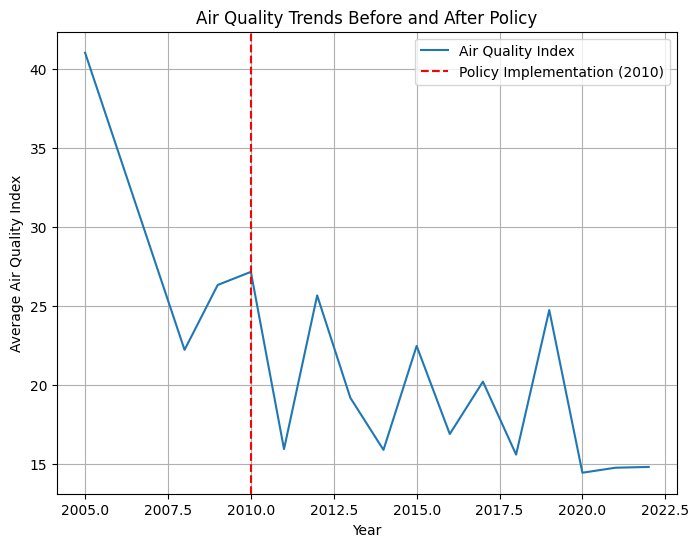

In [8]:
plt.figure(figsize=(8, 6))
sns.lineplot(data=air_quality.groupby('Year')['Data Value'].mean().reset_index(), x='Year', y='Data Value', label='Air Quality Index')
plt.axvline(x=policies["Air Quality Policy"], color='red', linestyle='--', label='Policy Implementation (2010)')
plt.title("Air Quality Trends Before and After Policy")
plt.xlabel("Year")
plt.ylabel("Average Air Quality Index")
plt.legend()
plt.grid(True)
plt.show()

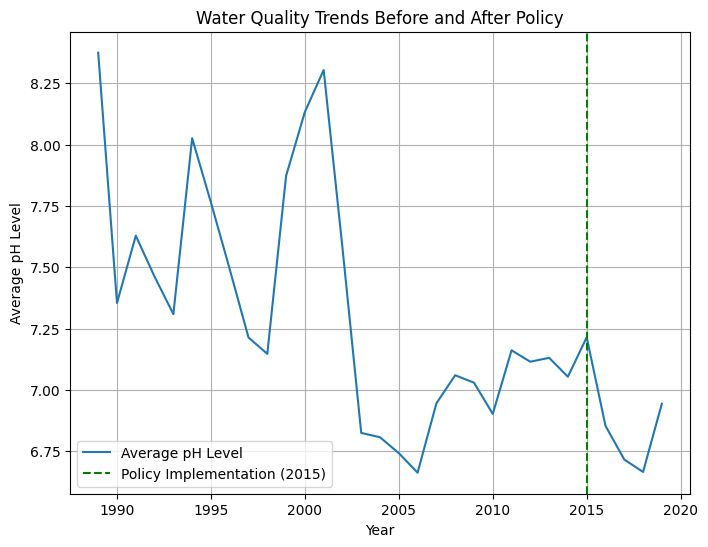

In [9]:
plt.figure(figsize=(8, 6))
sns.lineplot(data=water_quality.groupby('Year')['pH_Filled'].mean().reset_index(), x='Year', y='pH_Filled', label='Average pH Level')
plt.axvline(x=policies["Water Quality Improvement Act"], color='green', linestyle='--', label='Policy Implementation (2015)')
plt.title("Water Quality Trends Before and After Policy")
plt.xlabel("Year")
plt.ylabel("Average pH Level")
plt.legend()
plt.grid(True)
plt.show()

In [11]:
# Check if 'Year' and 'forest_change_percentage' exist
if 'Year' in deforestation.columns and 'forest_change_percentage' in deforestation.columns:
    # Ensure 'Year' is numeric
    deforestation['Year'] = pd.to_numeric(deforestation['Year'], errors='coerce')
    deforestation.dropna(subset=['Year'], inplace=True)

    # Group by Year and calculate the mean forest change percentage
    deforestation_trend = deforestation.groupby('Year')['forest_change_percentage'].mean().reset_index()

    # Plot the deforestation trend
    plt.figure(figsize=(8, 6))
    sns.lineplot(data=deforestation_trend, x='Year', y='forest_change_percentage', label='Forest Area Change (%)')
    plt.axvline(x=policies["Deforestation Reduction Agreement"], color='blue', linestyle='--', label='Policy Implementation (2005)')
    plt.title("Deforestation Trends Before and After Policy")
    plt.xlabel("Year")
    plt.ylabel("Average Forest Area Change (%)")
    plt.legend()
    plt.grid(True)
    plt.show()
else:
    print("The required columns ('Year' and 'forest_change_percentage') are missing in the deforestation dataset.")


The required columns ('Year' and 'forest_change_percentage') are missing in the deforestation dataset.


In [14]:
# Check and calculate deforestation change if not already done
if 'change_deforest' not in locals():
    if 'Year' in deforestation.columns and 'forest_change_percentage' in deforestation.columns:
        deforestation['Year'] = pd.to_numeric(deforestation['Year'], errors='coerce')
        deforestation.dropna(subset=['Year'], inplace=True)
        pre_deforest = deforestation[deforestation['Year'] < policies["Deforestation Reduction Agreement"]]['forest_change_percentage'].mean()
        post_deforest = deforestation[deforestation['Year'] >= policies["Deforestation Reduction Agreement"]]['forest_change_percentage'].mean()
        change_deforest = post_deforest - pre_deforest
    else:
        change_deforest = None

# Final output
print("\nFinal Analysis Summary:")
print(f"- Air Quality Policy (2010): Change in AQI: {change_air:.2f}")
print(f"- Water Quality Improvement Act (2015): Change in pH: {change_water:.2f}")
if change_deforest is not None:
    print(f"- Deforestation Reduction Agreement (2005): Change in forest area change (%): {change_deforest:.2f}")
else:
    print("- Deforestation data missing or incomplete for analysis.")


Final Analysis Summary:
- Air Quality Policy (2010): Change in AQI: -10.90
- Water Quality Improvement Act (2015): Change in pH: -0.41
- Deforestation data missing or incomplete for analysis.
